# Dimensionality and Classification

# Background

We are going to use an athlete data set from Australia containing various body/metabolic measurements along with self-reported sex and sport to see how well self-reported sex and sport can be predicted from the numbers. You can read [this article](https://www.kaggle.com/datasets/vikashrajluhaniwal/australian-athletes-data-set/) about the data set to understand what's in it. The linked webpage links to other pages with more info.


In [ ]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import gdown
import pandas as pd
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.metrics

import seaborn as sns

In [ ]:
# Google Drive file url
url = 'https://drive.google.com/uc?id=1m74Uu0qGLAHjEhRvQARjaZrnKC2kSbPS'

# Destination file path
output = '../output/ais.csv'

# Check if the file already exists
if os.path.exists(output):
    print(f"The file {output} already exists.")
else:
    gdown.download(url, output, quiet=False)

Load the information in `ais.csv` into a Pandas dataframe and `display()` the result.  Make sure the dataframe has the correct column names (`rcc`, `wcc`, _etc_.)

In [ ]:
# Load the data into a DataFrame
df = pd.read_csv('ais.csv')

# Display the DataFrame
print(df)

## Data Engineering

a. Make a Numpy array out of the set of columns in the dataframe that contain only numerical data and call it `X_u` (the `_u` means _unscaled_).

b. Make a Numpy array of the columns in the dataframe labeled `sex` and `sport` and name it `y`. These two variables will be used at various times below.  As a convenience, define `y_sex = y[:,0]` and `y_sport = y[:,1]`

c. Use `train_test_split()` to divide the data into training and testing partitions (`X_train_u`, `X_test_u`, `y_train`, `y_test`), with 30% in the testing partition. For convenience, also define `y_sex_train = y_train[:,0]` and `y_sport_train = y_train[:,1]` and `y_sex_test = y_test[:,0]` and `y_sport_test = y_test[:,1]`.

d. Train a `StandardScaler()` on `X_train_u` and used the trained scaler to transform:
 + `X_train_u` to `X_train`,
 + `X_test_u` to `X_test`, and
 + `X_u` to `X`.

In [ ]:
# a. Make a Numpy array out of the set of columns in the dataframe that contain only numerical data
X_u = df.select_dtypes(include=[np.number]).values

# b. Make a Numpy array of the columns in the dataframe labeled sex and sport
y = df[['sex', 'sport']].values
y_sex = y[:, 0]
y_sport = y[:, 1]

# c. Use train_test_split() to divide the data into training and testing partitions
X_train_u, X_test_u, y_train, y_test = sklearn.model_selection.train_test_split(X_u, y, test_size=0.3)

# Define y_sex_train, y_sport_train, y_sex_test, and y_sport_test
y_sex_train = y_train[:, 0]
y_sport_train = y_train[:, 1]
y_sex_test = y_test[:, 0]
y_sport_test = y_test[:, 1]

# d. Train a StandardScaler() on X_train_u
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train_u)

# Use the trained scaler to transform X_train_u to X_train, X_test_u to X_test, and X_u to X
X_train = scaler.transform(X_train_u)
X_test = scaler.transform(X_test_u)
X = scaler.transform(X_u)


a. Using `sklearn.decomposition.PCA`, perform a principal component analysis on `X`, retaining the two principal components with the largest variation.

b. Project `X` onto those two components. Call the result `Xp`.

c. Report the percentage of variation retained by those two components.

d. Print out and examine the coefficients of the two components.

e. In the text cell below your code cell, comment on what _original features_ influence the two _output features_ most strongly (remember - strong negative influence is strong influence!)


In [ ]:
# a. Perform a principal component analysis on X, retaining the two principal components with the largest variation
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)

# b. Project X onto those two components
Xp = pca.transform(X)

# c. Report the percentage of variation retained by those two components
explained_variance = pca.explained_variance_ratio_
print(f"Percentage of variation retained by the first component: {explained_variance[0]*100:.2f}%")
print(f"Percentage of variation retained by the second component: {explained_variance[1]*100:.2f}%")

# d. Print out and examine the coefficients of the two components
print(f"Coefficients of the first component: {pca.components_[0]}")
print(f"Coefficients of the second component: {pca.components_[1]}")

For the first component, the features with the highest absolute values of coefficients at index 8, 2, and 3 with coefficients of 0.40809959, 0.38149427, and 0.38595391 respectively. These features have a strong positive influence on the first component.

For the second component, the features with the highest absolute values of coefficients are at index 6, 7, and 5 with coefficients of 0.54000974, 0.48614591, and 0.41005425 respectively.

Plot the patterns in `Xp` on a 2D scatter plot, labeled by self-reported sex (which is `y[:,0]`). The $x$-coordinate on the plot is the feature in `Xp` with highest variance, and the $y$-coordinate is the feature in `Xp` with the second-highest variance.  The patterns with an srs label of 'f' should all be the same color; the projections of pattern with a srs label of 'm' should all be the same color that is different from the 'f' color. yout plot should have a legend with `f` and `m` depicted.  Label the x axis  as "component 1: XX% of total variation" for the proper value of XX; label the y axis similarly.

In [ ]:
mask_f = y_sex == 'f'
mask_m = y_sex == 'm'

# Plot the patterns in Xp
plt.figure(figsize=(10, 7))
plt.scatter(Xp[mask_f, 0], Xp[mask_f, 1], color='red', label='f')
plt.scatter(Xp[mask_m, 0], Xp[mask_m, 1], color='blue', label='m')

# Label the axes
plt.xlabel(f"Component 1: {explained_variance[0]*100:.2f}% of total variation")
plt.ylabel(f"Component 2: {explained_variance[1]*100:.2f}% of total variation")

# Add a legend
plt.legend()

# Show the plot
plt.show()

Repeat previous part, but label the points by sport.

In [ ]:
# Convert y_sport to a list for easier manipulation
y_sport_list = y_sport.tolist()

# Get unique sports and assign each one a unique color
unique_sports = list(set(y_sport_list))
colors = sns.color_palette('hsv', len(unique_sports))

# Create a dictionary to map each sport to a unique color
sport_color_dict = dict(zip(unique_sports, colors))

# Plot the patterns in Xp
plt.figure(figsize=(10, 7))

for sport in unique_sports:
    mask = np.array(y_sport_list) == sport
    plt.scatter(Xp[mask, 0], Xp[mask, 1], color=sport_color_dict[sport], label=sport)

# Label the axes
plt.xlabel(f"Component 1: {explained_variance[0]*100:.2f}% of total variation")
plt.ylabel(f"Component 2: {explained_variance[1]*100:.2f}% of total variation")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In the text cell below:
 + discuss whether the 2D PCA projection (depicted in problem 5) was able to preserve any separation between athletes of different reported sex.  If it was, create a figure depicting a reasonable linear decision boundary overlaid on the 2D projection. Submit the figure as an additional attachment to the submission.
 + provide a similar discussion for the data when sport labels are considered.

The 2D PCA projection was able to preserve some degree of separation between athletes of different reported sex. There seems to be a clear distinction between the two groups. The PCA projection has captured some of the differences in the original high-dimensional data related to the athletes sex.


The 2D PCA projection shows a moderate level of separation between athletes of different sports. The various colors represent different sports, and while clusters are visible, they are not distinctly separated. This indicates that the PCA projection was able to preserve some separation between the groups, but not entirely.

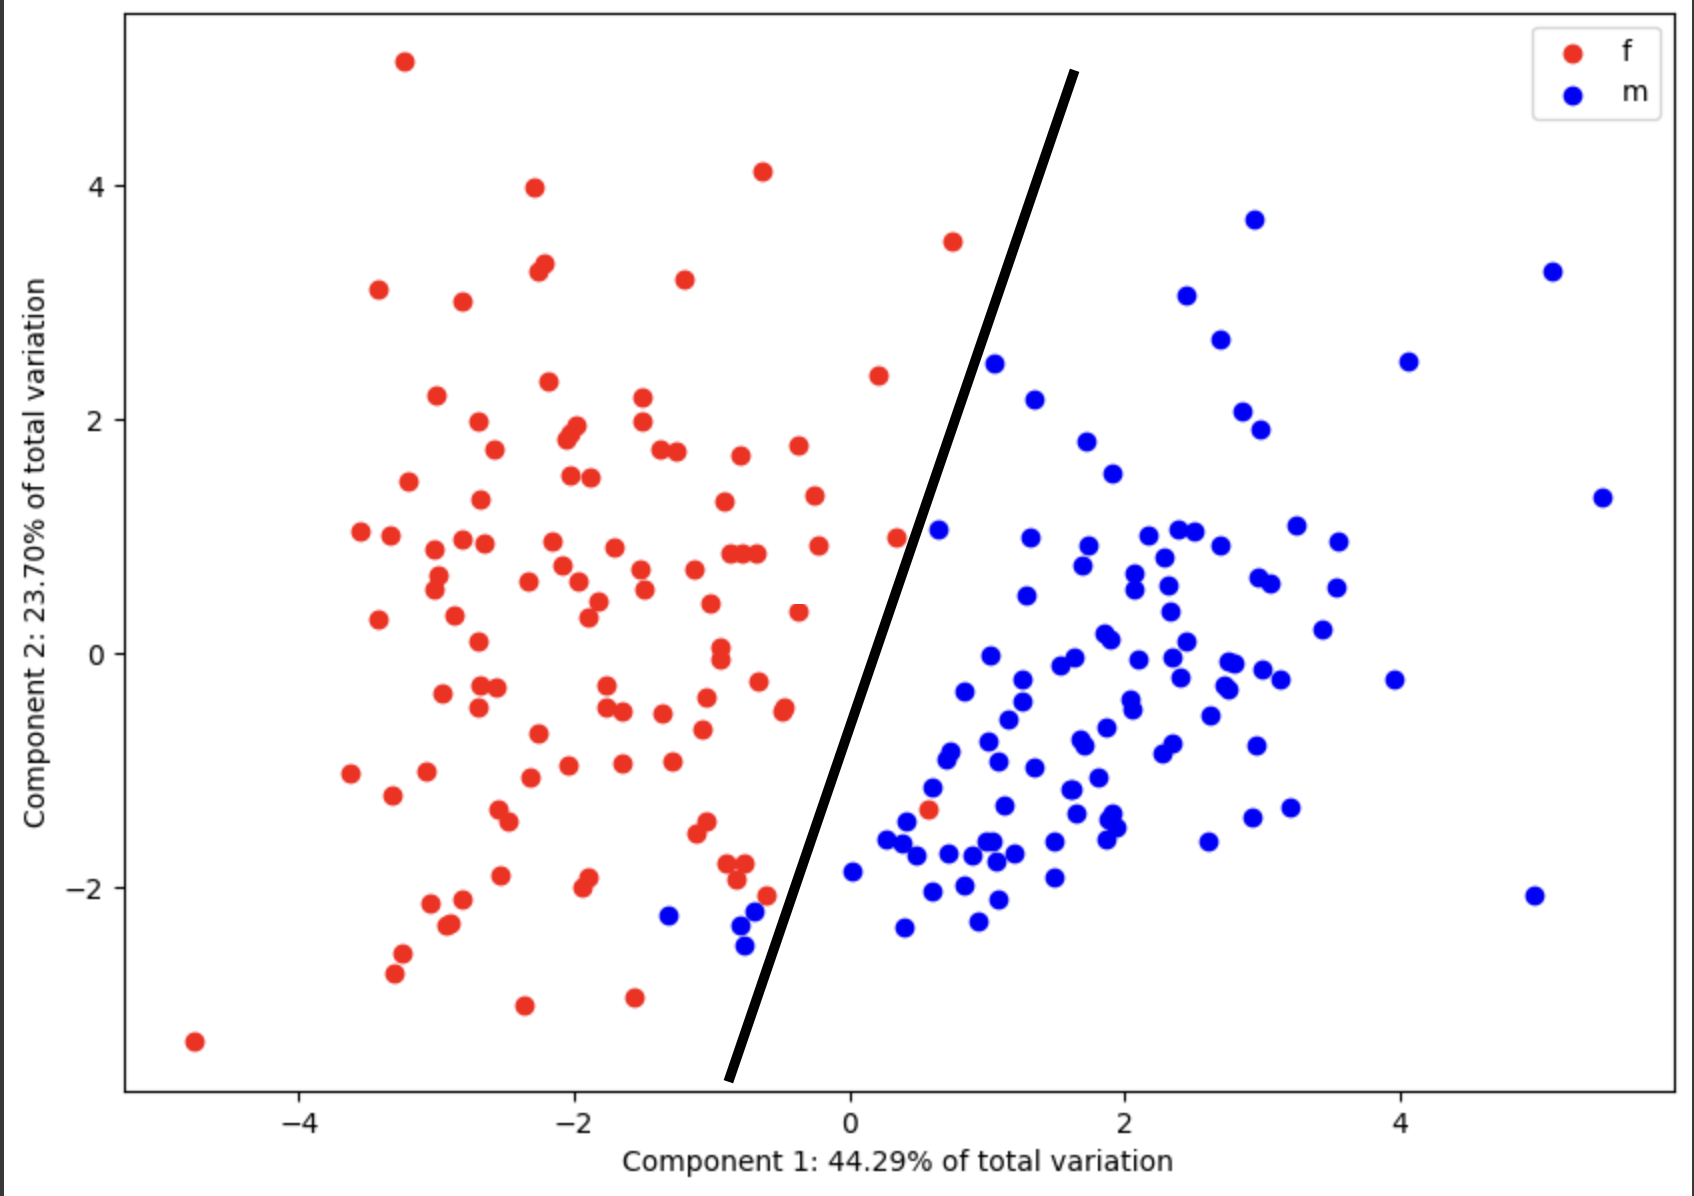

Run $k$-means clustering on `X`, for $k$=2, 3, 4, 10, 11, 12. Compute and report the clustering label homogeneity score with `y_sex` for $k$=2, 3, 4, and with `y_sport` for $k$=10, 11, 12.  In a text box below your code, answer these questions: Does $k$-means yield a 2, 3, or 4-cluster solution that captures self-reported sex well? Does $k$-means reproduce a 10, 11, or 12-cluster solution that captures sport labeling well?

In [ ]:
# Define the range of k values
k_values_sex = [2, 3, 4]
k_values_sport = [10, 11, 12]

# Perform k-means clustering for k=2, 3, 4 and compute homogeneity score with y_sex
for k in k_values_sex:
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
    labels = kmeans.labels_
    score = sklearn.metrics.homogeneity_score(y_sex, labels)
    print(f"Clustering label homogeneity score with y_sex for k={k}: {score}")

# Perform k-means clustering for k=10, 11, 12 and compute homogeneity score with y_sport
for k in k_values_sport:
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
    labels = kmeans.labels_
    score = sklearn.metrics.homogeneity_score(y_sport, labels)
    print(f"Clustering label homogeneity score with y_sport for k={k}: {score}")

For self-reported sex (y_sex):
The k-means clustering with k=4 has the highest homogeneity score of 0.868, which suggests that it captures the self-reported sex relatively well compared to k=2 and k=3.

For sport labeling (y_sport):
The k-means clustering with k=12 has the highest homogeneity score of 0.357, which suggests that it captures the sport labeling better than k=10 and k=11. However, the score is still quite low, indicating that the clustering might not be very effective in capturing the sport labeling.

Agglomerative clustering can work where $k$-means fails... does it work here?

![hf](https://lh6.googleusercontent.com/Ek0kFbKQ_HhZx8bNXT8tpsX7JZswpY7UAKl01tCwcttRhwQ8TQPFznQN1Yn5G6PHvHpfm2qFZRNhGiyVU7yhn-ei_QzfMjGTIkVIikbP3uyQyTrQmU3dYnNHjr0iRBUbQMp1WCIR)

Repeat qprevious part using hierarchical clustering with Ward's linkage and the Euclidean distance ("affinity"). In a text box below the code, report the homogeneity scores and add your comments on whether cluster labels were reproduced. Also, comment on whether Ward's method did a better job than K-means on this data set.

In [ ]:
# Perform hierarchical clustering for k=2, 3, 4 and compute homogeneity score with y_sex
for k in k_values_sex:
    ward = sklearn.cluster.AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean').fit(X)
    labels = ward.labels_
    score = sklearn.metrics.homogeneity_score(y_sex, labels)
    print(f"Clustering label homogeneity score with y_sex for k={k}: {score}")

# Perform hierarchical clustering for k=10, 11, 12 and compute homogeneity score with y_sport
for k in k_values_sport:
    ward = sklearn.cluster.AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean').fit(X)
    labels = ward.labels_
    score = sklearn.metrics.homogeneity_score(y_sport, labels)
    print(f"Clustering label homogeneity score with y_sport for k={k}: {score}")

For self-reported sex (y_sex):
The hierarchical clustering with k=4 has the highest homogeneity score of 0.799, which suggests that it captures the self-reported sex relatively well compared to k=2 and k=3.

For sport labeling (y_sport):
The hierarchical clustering with k=12 has the highest homogeneity score of 0.362, which suggests that it captures the sport labeling better than k=10 and k=11. However, the score is still quite low, indicating that the clustering might not be very effective in capturing the sport labeling.

For self-reported sex (y_sex), both k-means and hierarchical clustering with k=4 have similar homogeneity scores (0.868 for k-means and 0.799 for hierarchical clustering). This suggests that both methods capture the self-reported sex relatively well.

For sport labeling (y_sport), both k-means and hierarchical clustering with k=12 have similar homogeneity scores (0.357 for k-means and 0.362 for hierarchical clustering). However, these scores are quite low, indicating that neither method is very effective in capturing the sport labeling.